In [ ]:
import pandas as pd

df = pd.read_csv('/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

print(df.head())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  


In [ ]:
# Count of unique values
unique_majors = df["Major"].nunique()
unique_universities = df["University"].nunique()
unique_orders = df["Order"].nunique()
average_time = df["Time"].mean()
print(f"Average Opening Time: {average_time:.2f} hours")
print(f"Unique Majors: {unique_majors}")
print(f"Unique Universities: {unique_universities}")
print(f"Unique Orders: {unique_orders}")


Average Opening Time: 12.53 hours
Unique Majors: 20
Unique Universities: 10
Unique Orders: 10


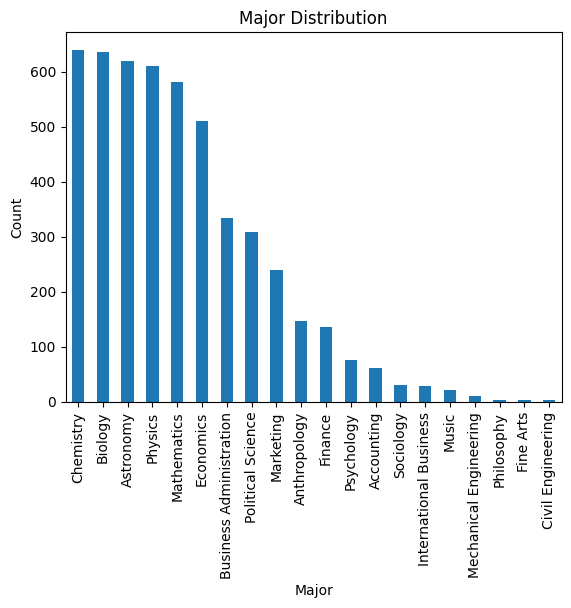

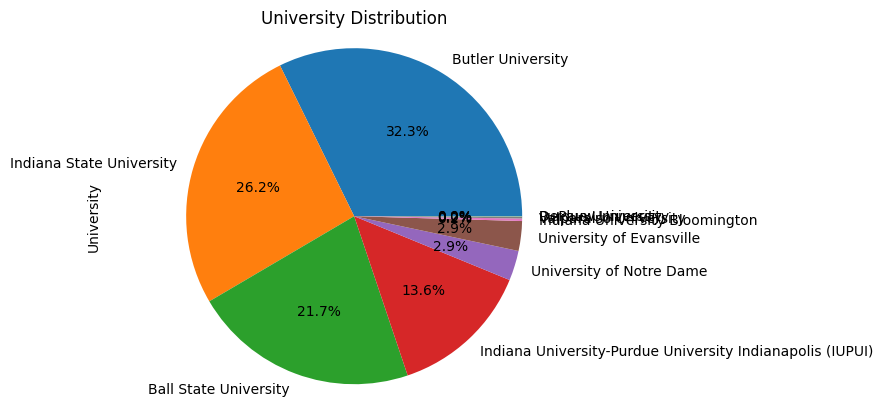

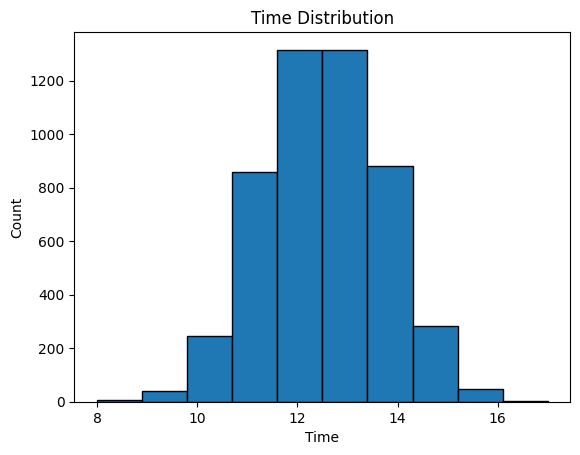

In [ ]:
import matplotlib.pyplot as plt

# Visualize Major distribution
major_counts = df["Major"].value_counts()
major_counts.plot(kind="bar")
plt.title("Major Distribution")
plt.xlabel("Major")
plt.ylabel("Count")
plt.show()

# Visualize University distribution
university_counts = df["University"].value_counts()
university_counts.plot(kind="pie", autopct='%1.1f%%')
plt.title("University Distribution")
plt.axis("equal")
plt.show()

# Visualize Time distribution
plt.hist(df["Time"], bins=10, edgecolor='k')
plt.title("Time Distribution")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()


Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: Order, dtype: int64
Sugar Cream Pie
512


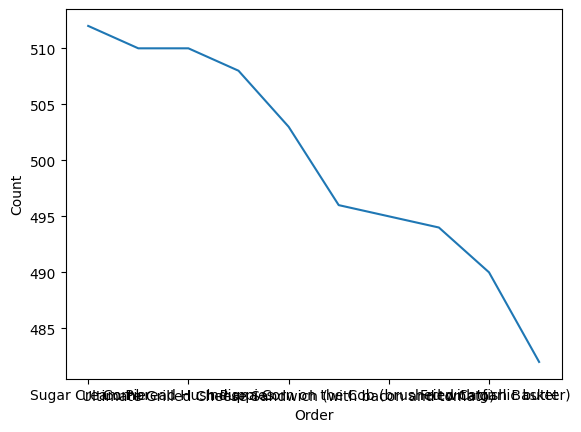

In [127]:
# Find the most popular order
most_popular_order = df["Order"].value_counts().idxmax()
most_popular_order_count = df["Order"].value_counts().max()

print(df["Order"].value_counts())

print(most_popular_order)
print(most_popular_order_count)

# Visualize Order distribution
order_counts = df["Order"].value_counts()
order_counts.plot(kind="line")
plt.xlabel("Order")
plt.ylabel("Count")
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import pickle

# Function to preprocess data and encode categorical variables (Major and University and School Year)

def preprocess(df):
  le_major = LabelEncoder()
  df["Major_encoded"] = le_major.fit_transform(df["Major"])
  le_university = LabelEncoder()
  df["University_encoded"] = le_university.fit_transform(df["University"])
  le_year = LabelEncoder()
  df["Year_encoded"] = le_year.fit_transform(df["Year"])

  return df

# Function to train our Decision Tree Classifier Model and store it using pickle

def train_and_pickle_model(X_train, y_train, model_path):
    # Create and train a Decision Tree Classifier model
    model = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_split=10, max_depth=12, min_samples_leaf=6)
    model.fit(X_train, y_train)

    # Pickle the trained model and save it to a file
    with open(model_path, 'wb') as model_file:
        pickle.dump(model, model_file)

# Function to test our model and predict results for custom inputs

def test_model(X_test, model_path, custom_inputs):
    # Load the trained model from the file
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Create an empty list to store the predicted orders
    predicted_orders = []

    # Iterate through each custom input
    for input_data in custom_inputs:
        custom_input = pd.DataFrame(input_data)

        # Encode the categorical variables in the custom input
        custom_input["Major_encoded"] = le_major.transform(custom_input["Major"])
        custom_input["University_encoded"] = le_university.transform(custom_input["University"])
        custom_input["Year_encoded"] = le_year.transform(custom_input["Year"])

        # Define the custom input features
        X_custom = custom_input[["Major_encoded", "University_encoded", "Year_encoded"]]

        # Predict the student order using the trained model
        predicted_order = model.predict(X_custom)

        # Append the predicted order to the list
        predicted_orders.append(predicted_order[0])

    return y_pred, predicted_orders

df = preprocess(df)

X = df[["Major_encoded", "University_encoded", "Year_encoded"]]
y = df["Order"]
model_path = "/content/your_model.pkl"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_and_pickle_model(X_train, y_train, model_path)


# List of custom inputs
custom_inputs = [
    {
        "Year": ["Year 3"],
        "Major": ["Astronomy"],
        "University": ["Ball State University"],
        "Time": [14]
    },
    {
        "Year": ["Year 4"],
        "Major": ["Physics"],
        "University": ["Indiana State University"],
        "Time": [12]
    },
    {
        "Year": ["Year 1"],
        "Major": ["Chemistry"],
        "University": ["Butler University"],
        "Time": [11]
    },
    {
        "Year": ["Year 2"],
        "Major": ["Biology"],
        "University": ["University of Notre Dame"],
        "Time": [14]
    }
]

y_pred, predicted_orders = test_model(X_test, model_path, custom_inputs)
for i, order in enumerate(predicted_orders):
    print(f"Predicted Student Order {i + 1}: {order}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error
error = 1 - accuracy

print(f"Accuracy: {accuracy:.2f}")
print(f"Error: {error:.2f}")

Predicted Student Order 1: Indiana Corn on the Cob (brushed with garlic butter)
Predicted Student Order 2: Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Predicted Student Order 3: Indiana Pork Chili
Predicted Student Order 4: Breaded Pork Tenderloin Sandwich
Accuracy: 0.49
Error: 0.51
